#3.Clustering

In [ ]:
import sklearn
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('학습데이터.csv', encoding='cp949')
data = data[data.columns[1:9]]
data

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
0,37539.8600,0.003819,0.003769,0.191271,1750813.00,0.228706,0.420000,0.542044
1,97668.0400,0.010058,0.010262,0.516745,5250627.00,0.687627,1.265739,1.626682
2,116421.6900,0.011526,0.013225,0.622987,6996016.50,0.919631,1.698197,2.170307
3,102914.1500,0.011093,0.016056,0.618719,6988816.00,0.921788,1.706123,2.172242
4,59536.0940,0.008747,0.014639,0.479102,5238026.00,0.691662,1.280612,1.630073
...,...,...,...,...,...,...,...,...
44635,5590.4460,0.032012,0.000081,0.199746,444541.30,0.115401,0.154109,0.298674
44636,17054.8460,0.092717,0.000231,0.578075,1321078.00,0.337970,0.459759,0.897806
44637,24168.2750,0.126542,0.000323,0.789578,1727693.20,0.434540,0.608324,1.199108
44638,19533.7950,0.102981,0.000280,0.643914,1270317.40,0.316776,0.453810,0.899494


In [ ]:
y = data[data.columns[7:]]
y

,완속충전소개수(y)
0,0.542044
1,1.626682
2,2.170307
3,2.172242
4,1.630073
...,...
44635,0.298674
44636,0.897806
44637,1.199108
44638,0.899494


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(data)
std_final_data = std_scaler.transform(data)
std_final_data = pd.DataFrame(std_final_data, columns=['공시지가', '단지 전기차수', '주변 충전소 수', '주차장 수', '평당가', '평균 앱 사용자 수', '평균 앱사용 시간대', '완속충전소개수(y)'])
std_final_data

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
0,-0.659577,-0.489340,-0.380576,-0.645313,-0.973591,-1.286338,-1.220554,-0.806981
1,-0.408296,-0.480298,-0.332284,-0.622294,0.123384,-0.190836,-0.081403,-0.129103
2,-0.329923,-0.478171,-0.310245,-0.614780,0.670456,0.362987,0.501088,0.210652
3,-0.386372,-0.478797,-0.289188,-0.615082,0.668199,0.368137,0.511764,0.211862
4,-0.567653,-0.482198,-0.299729,-0.624956,0.119435,-0.181203,-0.061370,-0.126984
...,...,...,...,...,...,...,...,...
44635,-0.793096,-0.448484,-0.408007,-0.644714,-1.383027,-1.556810,-1.578690,-0.959083
44636,-0.745186,-0.360515,-0.406895,-0.617956,-1.108287,-1.025511,-1.167002,-0.584637
44637,-0.715458,-0.311498,-0.406206,-0.602998,-0.980838,-0.794986,-0.966895,-0.396329
44638,-0.734826,-0.345641,-0.406532,-0.613300,-1.124197,-1.076103,-1.175015,-0.583582


##K-Means

In [ ]:
from sklearn.cluster import KMeans

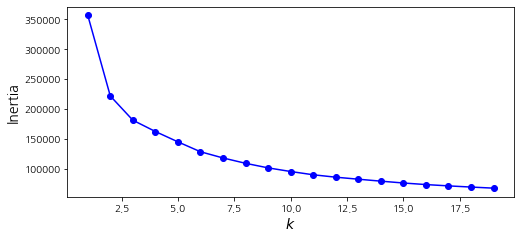

In [ ]:
# 1. Elbow point

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(std_final_data)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)

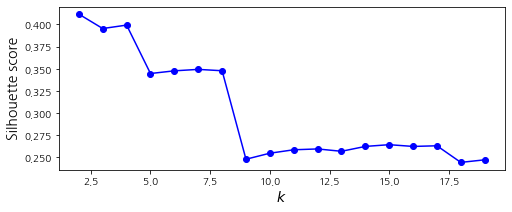

In [ ]:
silhouette_scores = [silhouette_score(std_final_data, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
kmeans.fit(std_final_data)
y_pred = kmeans.predict(std_final_data)
y_pred

array([1, 5, 5, ..., 1, 1, 1])

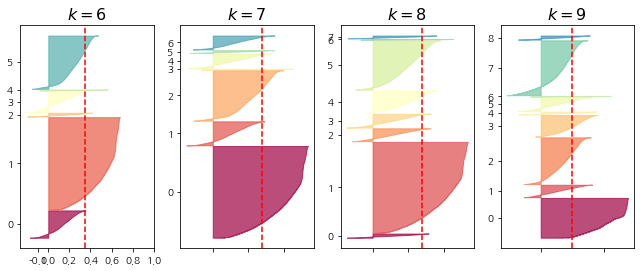

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k, n in zip((6,7,8,9),(5,6,7,8)):
    plt.subplot(2, 4, n)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(std_final_data, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

클러스터 모양과 Silhouette Score를 고려하여, K = 8채택

In [ ]:
clas = pd.DataFrame(y_pred, columns=['class'])

In [ ]:
data2 = pd.concat([std_final_data, clas], axis = 1)
data2

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y),class
0,-0.659577,-0.489340,-0.380576,-0.645313,-0.973591,-1.286338,-1.220554,-0.806981,1
1,-0.408296,-0.480298,-0.332284,-0.622294,0.123384,-0.190836,-0.081403,-0.129103,5
2,-0.329923,-0.478171,-0.310245,-0.614780,0.670456,0.362987,0.501088,0.210652,5
3,-0.386372,-0.478797,-0.289188,-0.615082,0.668199,0.368137,0.511764,0.211862,5
4,-0.567653,-0.482198,-0.299729,-0.624956,0.119435,-0.181203,-0.061370,-0.126984,5
...,...,...,...,...,...,...,...,...,...
44635,-0.793096,-0.448484,-0.408007,-0.644714,-1.383027,-1.556810,-1.578690,-0.959083,1
44636,-0.745186,-0.360515,-0.406895,-0.617956,-1.108287,-1.025511,-1.167002,-0.584637,1
44637,-0.715458,-0.311498,-0.406206,-0.602998,-0.980838,-0.794986,-0.966895,-0.396329,1
44638,-0.734826,-0.345641,-0.406532,-0.613300,-1.124197,-1.076103,-1.175015,-0.583582,1


<AxesSubplot:xlabel='완속충전소개수(y)', ylabel='주차장 수'>

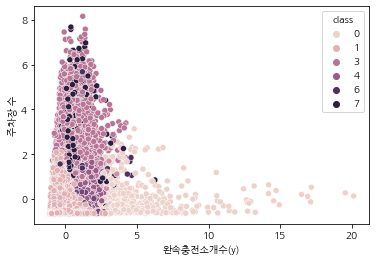

In [ ]:
sns.scatterplot(data=data2, x='완속충전소개수(y)', y='주차장 수',hue='class')

In [ ]:
data2.groupby('class').mean()

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
class,,,,,,,,
0,0.123077,0.525857,0.140359,-0.167883,0.796942,1.034200,0.899465,4.193220
1,-0.466887,-0.308864,-0.257741,-0.408957,-0.806971,-0.940245,-0.918353,-0.606709
2,2.441253,0.176419,0.223984,0.371211,1.108614,1.071374,1.060186,0.397641
3,1.097484,1.072655,0.826432,2.666767,1.207555,1.084528,1.087556,0.472623
4,-0.053091,0.061036,-0.043795,-0.027409,1.280707,1.383596,1.385014,0.852651
5,-0.121256,-0.073919,-0.154337,-0.185281,0.154636,0.358107,0.336922,0.108080
6,-0.340618,11.474440,-0.012436,0.554167,-0.142733,0.822305,0.587942,0.353866
7,0.990129,1.049808,6.261179,2.002420,0.941430,1.046086,0.989752,0.479917


In [ ]:
data2

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y),class
0,-0.659577,-0.489340,-0.380576,-0.645313,-0.973591,-1.286338,-1.220554,-0.806981,1
1,-0.408296,-0.480298,-0.332284,-0.622294,0.123384,-0.190836,-0.081403,-0.129103,5
2,-0.329923,-0.478171,-0.310245,-0.614780,0.670456,0.362987,0.501088,0.210652,5
3,-0.386372,-0.478797,-0.289188,-0.615082,0.668199,0.368137,0.511764,0.211862,5
4,-0.567653,-0.482198,-0.299729,-0.624956,0.119435,-0.181203,-0.061370,-0.126984,5
...,...,...,...,...,...,...,...,...,...
44635,-0.793096,-0.448484,-0.408007,-0.644714,-1.383027,-1.556810,-1.578690,-0.959083,1
44636,-0.745186,-0.360515,-0.406895,-0.617956,-1.108287,-1.025511,-1.167002,-0.584637,1
44637,-0.715458,-0.311498,-0.406206,-0.602998,-0.980838,-0.794986,-0.966895,-0.396329,1
44638,-0.734826,-0.345641,-0.406532,-0.613300,-1.124197,-1.076103,-1.175015,-0.583582,1


In [ ]:
data22 = pd.concat([data, clas], axis = 1)
data22

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y),class
0,37539.8600,0.003819,0.003769,0.191271,1750813.00,0.228706,0.420000,0.542044,1
1,97668.0400,0.010058,0.010262,0.516745,5250627.00,0.687627,1.265739,1.626682,5
2,116421.6900,0.011526,0.013225,0.622987,6996016.50,0.919631,1.698197,2.170307,5
3,102914.1500,0.011093,0.016056,0.618719,6988816.00,0.921788,1.706123,2.172242,5
4,59536.0940,0.008747,0.014639,0.479102,5238026.00,0.691662,1.280612,1.630073,5
...,...,...,...,...,...,...,...,...,...
44635,5590.4460,0.032012,0.000081,0.199746,444541.30,0.115401,0.154109,0.298674,1
44636,17054.8460,0.092717,0.000231,0.578075,1321078.00,0.337970,0.459759,0.897806,1
44637,24168.2750,0.126542,0.000323,0.789578,1727693.20,0.434540,0.608324,1.199108,1
44638,19533.7950,0.102981,0.000280,0.643914,1270317.40,0.316776,0.453810,0.899494,1


완속충전소는 가장 많이 존재하지만 Feature importance값이 가장 높은 주차장 수는 적은 Cluster 0번과 4번 배제

In [ ]:
data3 = data22[(data22['class'] != 0) & (data2['class'] != 4)]
data3

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y),class
0,37539.8600,0.003819,0.003769,0.191271,1750813.00,0.228706,0.420000,0.542044,1
1,97668.0400,0.010058,0.010262,0.516745,5250627.00,0.687627,1.265739,1.626682,5
2,116421.6900,0.011526,0.013225,0.622987,6996016.50,0.919631,1.698197,2.170307,5
3,102914.1500,0.011093,0.016056,0.618719,6988816.00,0.921788,1.706123,2.172242,5
4,59536.0940,0.008747,0.014639,0.479102,5238026.00,0.691662,1.280612,1.630073,5
...,...,...,...,...,...,...,...,...,...
44635,5590.4460,0.032012,0.000081,0.199746,444541.30,0.115401,0.154109,0.298674,1
44636,17054.8460,0.092717,0.000231,0.578075,1321078.00,0.337970,0.459759,0.897806,1
44637,24168.2750,0.126542,0.000323,0.789578,1727693.20,0.434540,0.608324,1.199108,1
44638,19533.7950,0.102981,0.000280,0.643914,1270317.40,0.316776,0.453810,0.899494,1


In [ ]:
data4 = data3[data3.columns[:8]]

In [ ]:
data4

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
0,37539.8600,0.003819,0.003769,0.191271,1750813.00,0.228706,0.420000,0.542044
1,97668.0400,0.010058,0.010262,0.516745,5250627.00,0.687627,1.265739,1.626682
2,116421.6900,0.011526,0.013225,0.622987,6996016.50,0.919631,1.698197,2.170307
3,102914.1500,0.011093,0.016056,0.618719,6988816.00,0.921788,1.706123,2.172242
4,59536.0940,0.008747,0.014639,0.479102,5238026.00,0.691662,1.280612,1.630073
...,...,...,...,...,...,...,...,...
44635,5590.4460,0.032012,0.000081,0.199746,444541.30,0.115401,0.154109,0.298674
44636,17054.8460,0.092717,0.000231,0.578075,1321078.00,0.337970,0.459759,0.897806
44637,24168.2750,0.126542,0.000323,0.789578,1727693.20,0.434540,0.608324,1.199108
44638,19533.7950,0.102981,0.000280,0.643914,1270317.40,0.316776,0.453810,0.899494


In [ ]:
final_data = data4

In [ ]:
final_data

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
0,37539.8600,0.003819,0.003769,0.191271,1750813.00,0.228706,0.420000,0.542044
1,97668.0400,0.010058,0.010262,0.516745,5250627.00,0.687627,1.265739,1.626682
2,116421.6900,0.011526,0.013225,0.622987,6996016.50,0.919631,1.698197,2.170307
3,102914.1500,0.011093,0.016056,0.618719,6988816.00,0.921788,1.706123,2.172242
4,59536.0940,0.008747,0.014639,0.479102,5238026.00,0.691662,1.280612,1.630073
...,...,...,...,...,...,...,...,...
44635,5590.4460,0.032012,0.000081,0.199746,444541.30,0.115401,0.154109,0.298674
44636,17054.8460,0.092717,0.000231,0.578075,1321078.00,0.337970,0.459759,0.897806
44637,24168.2750,0.126542,0.000323,0.789578,1727693.20,0.434540,0.608324,1.199108
44638,19533.7950,0.102981,0.000280,0.643914,1270317.40,0.316776,0.453810,0.899494


In [ ]:
X = final_data[['공시지가', '단지 전기차수', '주변 충전소 수', '주차장 수', '평당가', '평균 앱 사용자 수', '평균 앱사용 시간대']]
y = final_data['완속충전소개수(y)']

In [ ]:
y

0        0.542044
1        1.626682
2        2.170307
3        2.172242
4        1.630073
           ...   
44635    0.298674
44636    0.897806
44637    1.199108
44638    0.899494
44639    0.299518
Name: 완속충전소개수(y), Length: 38582, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#4.Regression 모델
(Linear Regression / Random Forest / XGBoost)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from math import sqrt
import xgboost as xgb

std_scaler = StandardScaler()
lin_reg = LinearRegression()
RFregr = RandomForestRegressor(max_features=7,min_samples_leaf=4,min_samples_split=10,n_estimators=1000, n_jobs=-1)
x_model = xgb.XGBRegressor(
 learning_rate =0.08,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=3,
 gamma=0,
 subsample=0.75,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=1,nthread=None)

reg_pipe = Pipeline([
        ("lin_reg", lin_reg)
    ])
RF_pipe = Pipeline([
        ("Ran_For", RFregr),
    ])
Xgb_pipe = Pipeline([
        ("Xgb", x_model),
    ])
pipe_svr = Pipeline([
                 ('fit', SVR())])

In [ ]:
reg_pipe.fit(X_train, y_train)
RF_pipe.fit(X_train, y_train)
Xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('Xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.08, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=8, max_leaves=0, min_child_weight=3,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, nthread=0,
                              num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=200, ...))])

In [ ]:
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('fit', SVR())])

In [ ]:
print('선형회귀 train RMSE:', sqrt(mean_squared_error(y_train, reg_pipe.predict(X_train))))
print('선형회귀 test RMSE:', sqrt(mean_squared_error(y_test, reg_pipe.predict(X_test))))
print('랜덤 포레스트 train RMSE:', sqrt(mean_squared_error(y_train, RF_pipe.predict(X_train))))
print('랜덤 포레스트 test RMSE:', sqrt(mean_squared_error(y_test, RF_pipe.predict(X_test))))
print('Xgb train RMSE:', sqrt(mean_squared_error(y_train, Xgb_pipe.predict(X_train))))
print('Xgb test RMSE:', sqrt(mean_squared_error(y_test, Xgb_pipe.predict(X_test))))

선형회귀 train RMSE: 0.7261306119668807
선형회귀 test RMSE: 0.7188962807264634
랜덤 포레스트 train RMSE: 0.3033566231720326
랜덤 포레스트 test RMSE: 0.4689901655148595
Xgb train RMSE: 0.6436381838170585
Xgb test RMSE: 0.6482870921732634


In [ ]:
print('svr train RMSE:', sqrt(mean_squared_error(y_train, pipe_svr.predict(X_train))))
print('svr test RMSE:', sqrt(mean_squared_error(y_test, pipe_svr.predict(X_test))))

svr train RMSE: 0.7764894940299925
svr test RMSE: 0.76967328616329


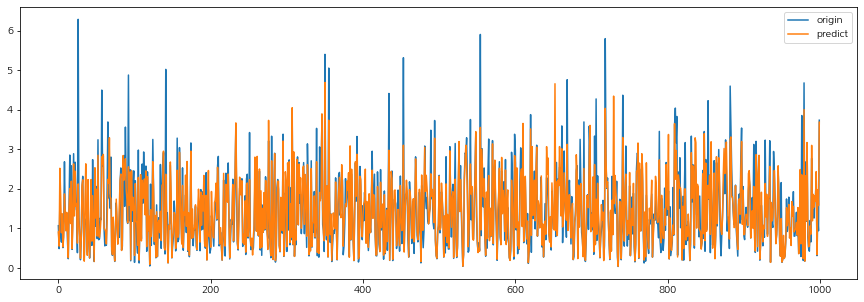

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test.reset_index(drop=True)[:1000], label="origin")
plt.plot(RF_pipe.predict(X_test)[:1000], label="predict")
plt.legend()
plt.show()

C:\Users\LGe\anaconda3\envs\BasicML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


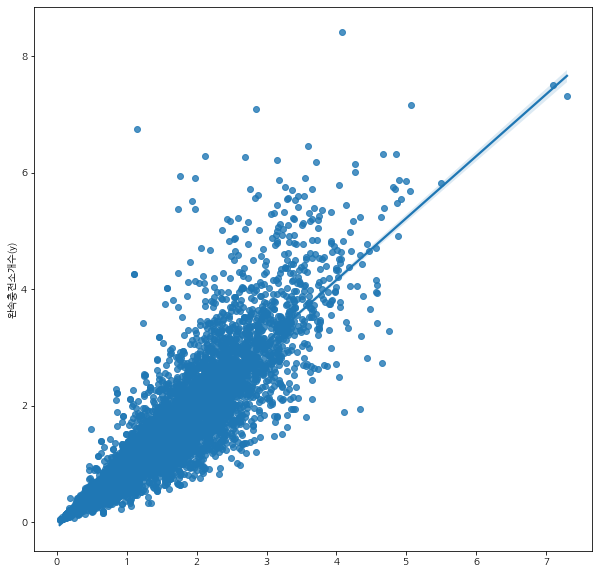

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(RF_pipe.predict(X_test), y_test.reset_index(drop=True))
plt.show()

In [ ]:
r2_score(y_test, reg_pipe.predict(X_test))

0.521337735430127

In [ ]:
r2_score(y_test, RF_pipe.predict(X_test))

0.7962844459732659

In [ ]:
r2_score(y_test, Xgb_pipe.predict(X_test))

0.6107474495467369

In [ ]:
r2_score(y_test, pipe_svr.predict(X_test))

0.4513321102655019

In [ ]:
RF_pipe_final = Pipeline([
        ("Ran_For", RFregr),
    ])

In [ ]:
RF_pipe_final.fit(X,y)

Pipeline(steps=[('Ran_For',
                 RandomForestRegressor(max_features=7, min_samples_leaf=4,
                                       min_samples_split=10, n_estimators=1000,
                                       n_jobs=-1))])

In [ ]:
y

0        0.542044
1        1.626682
2        2.170307
3        2.172242
4        1.630073
           ...   
44635    0.298674
44636    0.897806
44637    1.199108
44638    0.899494
44639    0.299518
Name: 완속충전소개수(y), Length: 38582, dtype: float64

In [ ]:
final_testdata = pd.read_csv("최종 데이터프레임.csv", encoding='cp949')

In [ ]:
final_testdata

,log,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,2.104371e+07,6.017889,3.689155,7.483954
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,3.135872e+07,7.183529,3.683445,6.642494
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,2.194031e+07,7.606090,3.559364,12.344389
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,1.716051e+07,6.060043,3.647104,9.351436
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,2.540851e+07,6.993432,3.558926,7.138107
...,...,...,...,...,...,...,...,...,...,...
4845,127.10820,37.24177,110499.99,1.476302,0.485319,34.403537,2.152764e+07,5.656341,3.690215,12.458458
4846,127.11363,37.28325,2491999.33,0.791833,0.151816,34.532166,2.580148e+07,5.884816,3.771855,9.181576
4847,127.11796,37.31932,1397569.20,0.198403,0.026216,8.842356,2.864321e+07,5.885125,3.713812,4.468109
4848,127.20294,37.23303,2427028.47,0.155378,0.078173,3.168263,8.313356e+06,5.932897,3.579146,5.089964


In [ ]:
#final_testdata = final_testdata.astype("float32")

In [ ]:
y = final_testdata[final_testdata.columns[9:]]
X = final_testdata[final_testdata.columns[2:9]]

In [ ]:
X

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대
0,306859.56,1.028242,0.098762,40.022862,2.104371e+07,6.017889,3.689155
1,3069848.21,3.365778,0.514029,205.882898,3.135872e+07,7.183529,3.683445
2,1647902.01,0.868940,0.148877,34.353956,2.194031e+07,7.606090,3.559364
3,161896.49,0.123951,0.020706,3.597324,1.716051e+07,6.060043,3.647104
4,994081.49,0.252548,0.036962,7.476866,2.540851e+07,6.993432,3.558926
...,...,...,...,...,...,...,...
4845,110499.99,1.476302,0.485319,34.403537,2.152764e+07,5.656341,3.690215
4846,2491999.33,0.791833,0.151816,34.532166,2.580148e+07,5.884816,3.771855
4847,1397569.20,0.198403,0.026216,8.842356,2.864321e+07,5.885125,3.713812
4848,2427028.47,0.155378,0.078173,3.168263,8.313356e+06,5.932897,3.579146


In [ ]:
y

,완속충전소개수(y)
0,7.483954
1,6.642494
2,12.344389
3,9.351436
4,7.138107
...,...
4845,12.458458
4846,9.181576
4847,4.468109
4848,5.089964


In [ ]:
RF_pipe_final.predict(X)

array([4.3758021 , 4.02647214, 3.73958914, ..., 3.93339566, 2.7882825 ,
       3.49384753])

In [ ]:
data_for_comp = pd.concat([final_testdata, pd.DataFrame(RF_pipe_final.predict(X),columns=["모델 제안 결과"])], axis = 1)

In [ ]:
data_for_comp

,log,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y),모델 제안 결과
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,2.104371e+07,6.017889,3.689155,7.483954,4.375802
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,3.135872e+07,7.183529,3.683445,6.642494,4.026472
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,2.194031e+07,7.606090,3.559364,12.344389,3.739589
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,1.716051e+07,6.060043,3.647104,9.351436,4.087853
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,2.540851e+07,6.993432,3.558926,7.138107,4.019019
...,...,...,...,...,...,...,...,...,...,...,...
4845,127.10820,37.24177,110499.99,1.476302,0.485319,34.403537,2.152764e+07,5.656341,3.690215,12.458458,4.564425
4846,127.11363,37.28325,2491999.33,0.791833,0.151816,34.532166,2.580148e+07,5.884816,3.771855,9.181576,3.700826
4847,127.11796,37.31932,1397569.20,0.198403,0.026216,8.842356,2.864321e+07,5.885125,3.713812,4.468109,3.933396
4848,127.20294,37.23303,2427028.47,0.155378,0.078173,3.168263,8.313356e+06,5.932897,3.579146,5.089964,2.788283
